In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
from clean_data import clean_requirements
from clean_data import *
import os
from sklearn.feature_extraction.text import TfidfVectorizer 


## This is the EDA to have a glimpse on the relation about Salary and 1. Location, 2. Job_category 3. Requirement
We noted that the salaries are in different forms, based on years/month, a certain number or a range, etc. Then We converted it into a certain salary per year.

In [44]:
job_salary = pd.read_csv("data.csv")
job_salary.salary

0      $36.45 - $43.04 an hour
1                  $43 an hour
2                  $28 an hour
3                  $46 an hour
4               $34.50 an hour
                ...           
945          $70 - $80 an hour
946            $120,000 a year
947             $40.35 an hour
948             $40.10 an hour
949                $35 an hour
Name: salary, Length: 950, dtype: object

Then We converted it into a certain salary per year.

In [45]:
job_salary = pd.read_csv("data.csv")
job_salary_cleaned = clean_requirements(job_salary)
job_salary_cleaned = convert_salary(job_salary)

# Have a look on the distribution of the Salary

the salary is based on per year. We can see most salary is in 50K to 100K, which agree with out intuition.

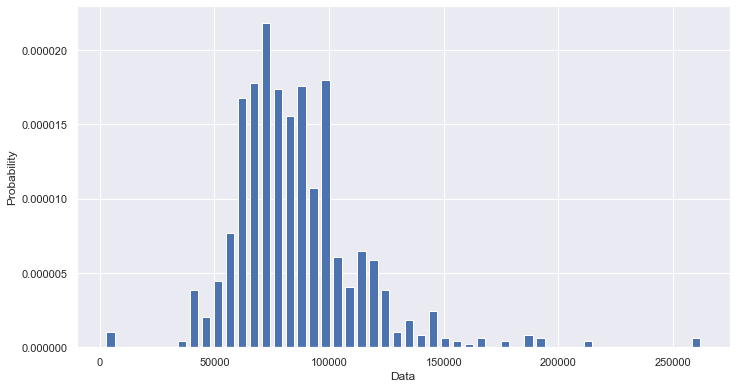

In [46]:
salary = job_salary_cleaned.salary.tolist()
plt.hist(salary,density=True, bins=50,rwidth=0.7)
plt.ylabel('Probability')
plt.xlabel('Data')
plt.show()

# EDA on the relation of the features with salaries

Before applying the Data science algorithms, we would like to have a preliminary analysis on the feautres.

In particular, we want to have some sense about how these features affect the salary by just doing some basic plots and calculating basic statistics.

## Look at location
We llok at the provinces and cities. It shows that the locations do affect the salaries very obviously.

We plot the mean salaries for each province and each city

In [47]:
data = job_salary_cleaned
data = clean_location(data)

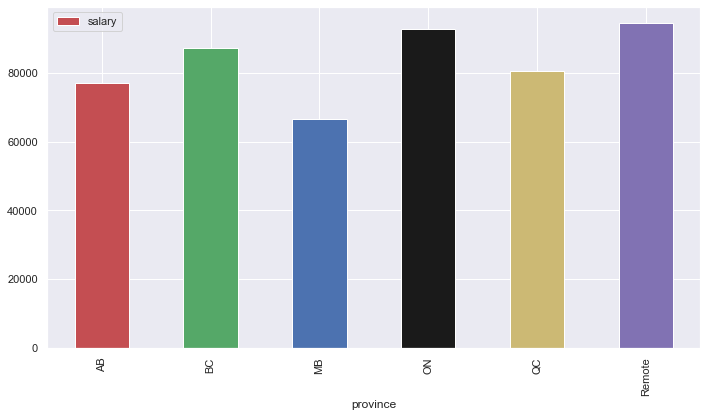

In [48]:
#prob = data['province'].value_counts()
#prob.plot(kind='bar')
#plt.show()
my_colors = 'rgbkymc' 
mean_salary = data.groupby(['province']).mean()
mean_salary.plot(kind='bar',color=my_colors)
plt.show()


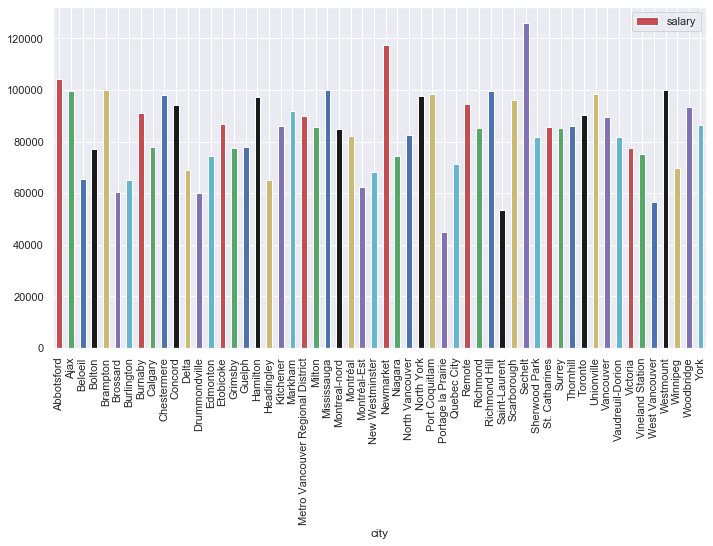

In [49]:
#top10 = mean_salary.loc[mean_salary['salary'] <150000]
mean_salary = data.groupby(['city']).mean()
mean_salary.plot(kind='bar',color=my_colors,)
plt.show()


## Look at the requirements

We have a look about what are the frequent words appears in the job requiremtns.

Then what are the frequent words in the high-salary jobs?

In [50]:
# extract features
vectorizer = TfidfVectorizer(max_features=1000)
corpus = data['requirements_cleaned'].values
grams = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
words_df = pd.DataFrame(grams.toarray(), columns=feature_names)

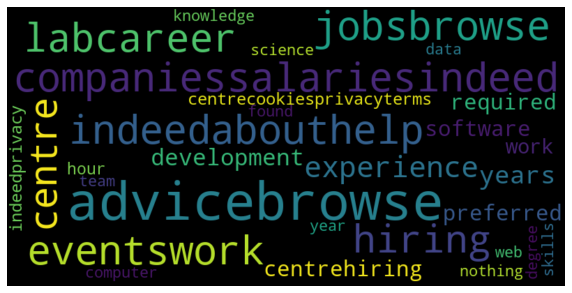

In [51]:
xxx = words_df.sum(axis=0)
sss = xxx.nlargest(30)
df = sss.to_frame()
df = df.reset_index()
df.columns = ['word', 'count']
words = dict(zip(df['word'].tolist(), df['count'].tolist()))

wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(words)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Next we llok at the words appearing in these job with salary > 10K

In [52]:
high_salary = data.loc[data['salary'] >100000]

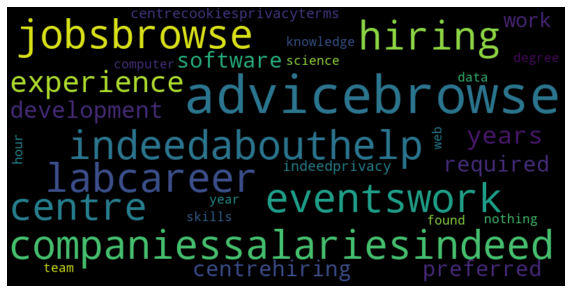

In [53]:
xxx = words_df.sum(axis=0)
sss = xxx.nlargest(30)
df = sss.to_frame()
df = df.reset_index()
df.columns = ['word', 'count']
data = dict(zip(df['word'].tolist(), df['count'].tolist()))

wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Look at Category
We crawled salaries for 5 different job categories. We see that at the current time most jobs are still about software and development.

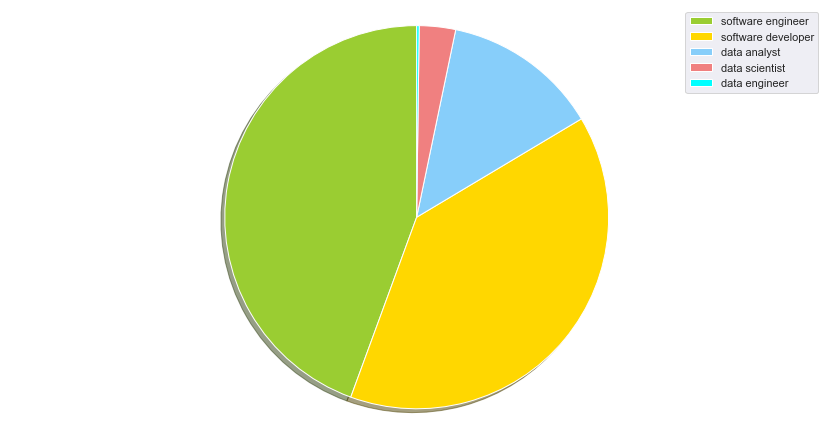

In [54]:
temp = job_salary['job_category'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })


labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

However, it is hard to iterpret if category affect salaries by EDA. Intuitively, these jobs seems to have similar salaries in a certain range.

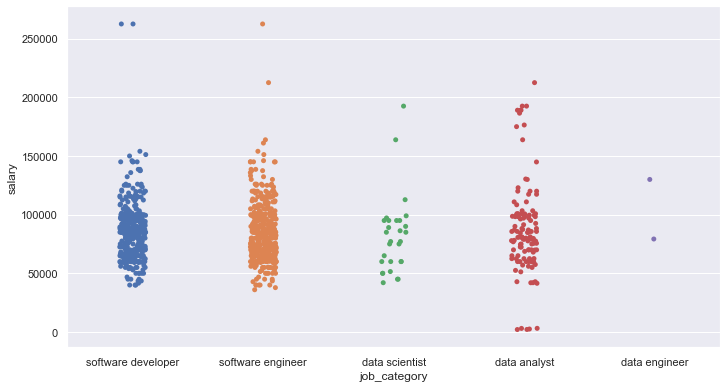

In [55]:
sns.set(style = 'whitegrid')   
sns.set(rc={'figure.figsize':(11.7,6.27)})      
sns.stripplot(x="job_category", y="salary", data=job_salary_cleaned) 
  
plt.show() 